In [ ]:
import pandas as pd
import numpy as np
pd.read_csv('MailCustomer.csv', index_col = 'CustomerKey', sep = ';' , encoding = "ISO-8859 -1")

,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,...,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,26,AW00011000,NaN,Jon,V,Yang,0,4/8/66,M,NaN,...,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,7/22/2005,1-2 Miles,Pacific,49,1
11001,37,AW00011001,NaN,Eugene,L,Huang,0,5/14/1965,S,NaN,...,0,1,2243 W St.,NaN,1 (11) 500 555-0110,7/18/2005,0-1 Miles,Pacific,50,1
11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,8/12/65,M,NaN,...,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,7/10/05,2-5 Miles,Pacific,50,1
11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,2/15/1968,S,NaN,...,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,7/1/05,5-10 Miles,Pacific,47,1
11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,8/8/68,S,NaN,...,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,7/26/2005,1-2 Miles,Pacific,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,209,AW00029479,NaN,Tommy,L,Tang,0,7/4/58,M,NaN,...,1,0,"111, rue Maillard",NaN,1 (11) 500 555-0136,3/8/07,0-1 Miles,Europe,57,1
29480,248,AW00029480,NaN,Nina,W,Raji,0,11/10/60,S,NaN,...,1,0,9 Katherine Drive,NaN,1 (11) 500 555-0146,1/18/2008,0-1 Miles,Europe,54,1
29481,120,AW00029481,NaN,Ivan,NaN,Suri,0,1/5/60,S,NaN,...,0,0,Knaackstr 4,NaN,1 (11) 500 555-0144,2/13/2006,0-1 Miles,Europe,55,1


In [ ]:
data = pd.read_csv('MailCustomer.csv', index_col = 'CustomerKey', sep = ';' , encoding = "ISO-8859 -1")
print ( data.head() )
print ( " - - - - - - - - - - - - - - - - - - - - " )
print ( data.tail() )

             GeographyKey CustomerAlternateKey Title  FirstName MiddleName  \
CustomerKey                                                                  
11000                  26           AW00011000   NaN        Jon          V   
11001                  37           AW00011001   NaN     Eugene          L   
11002                  31           AW00011002   NaN      Ruben        NaN   
11003                  11           AW00011003   NaN    Christy        NaN   
11004                  19           AW00011004   NaN  Elizabeth        NaN   

            LastName  NameStyle  BirthDate MaritalStatus Suffix  ...  \
CustomerKey                                                      ...   
11000           Yang          0     4/8/66             M    NaN  ...   
11001          Huang          0  5/14/1965             S    NaN  ...   
11002         Torres          0    8/12/65             M    NaN  ...   
11003            Zhu          0  2/15/1968             S    NaN  ...   
11004        Johnson 

In [ ]:
if 'BirthDate' in data.columns:
  data['BirthDate'] = pd.to_datetime(data['BirthDate']).dt.strftime('%m/%d/%Y') #Pasamos todas las fechas incorrectas a un solo formato

for index, row in data.iterrows():
  birthdate = pd.to_datetime(row['BirthDate']) #Cogemos el valor actual y lo pasamos a str
  if birthdate.year > 2024:
      birthdate_str = row['BirthDate'] #pasamos la columna
      year = int(birthdate_str[-4:]) #contamos solo el año
      if year > 2024:
          new_year = year - 100
          new_birthdate_str = birthdate_str[:-4] + str(new_year) #combinamos la fecha original y la nueva
          data.loc[index, 'BirthDate'] = new_birthdate_str

for i, row in data.iterrows():
  birthdate = pd.to_datetime(row['BirthDate']) #Cogemos el valor actual y lo pasamos a str
  birthdate_str = row['BirthDate']
  birthyear = int(birthdate_str[-4:])
  updateAge = 2024 - birthyear #Restamos la fecha actual
  data.loc[i, 'Age'] = updateAge

data = data.fillna(' None ')
data = data.drop_duplicates()

<ipython-input-17-4cf5f116e9c6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['BirthDate'] = pd.to_datetime(data['BirthDate']).dt.strftime('%m/%d/%Y') #Pasamos todas las fechas incorrectas a un solo formato


Crea tres columnas nuevas y borrar la columna de BirthDate.

Estas tres nuevas columnas serán BirthDateDay, BirthDateMonth y BirthDateYear.

In [ ]:
for i, row in data.iterrows():
  birthdate_str = str(row['BirthDate']) #Cogemos el valor actual y lo pasamos a str
  birthmonth = (birthdate_str[:2]) #Dividimos cada parte de la cadena para cada variable
  birthday = (birthdate_str[3:5])
  birthyear = (birthdate_str[-4:])
  data.loc[i, 'BirthDateDay'] = birthday #Por cada celda asignamos la variable
  data.loc[i, 'BirthDateMonth'] = birthmonth
  data.loc[i, 'BirthDateYear'] = birthyear

data.drop(['BirthDate'] , axis = 'columns') #Eliminamos la anterior columna

,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,MaritalStatus,Suffix,Gender,...,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer,BirthDateDay,BirthDateMonth,BirthDateYear
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,26,AW00011000,None,Jon,V,Yang,0,M,None,M,...,None,1 (11) 500 555-0162,7/22/2005,1-2 Miles,Pacific,58,1,08,04,1966
11001,37,AW00011001,None,Eugene,L,Huang,0,S,None,M,...,None,1 (11) 500 555-0110,7/18/2005,0-1 Miles,Pacific,59,1,14,05,1965
11002,31,AW00011002,None,Ruben,None,Torres,0,M,None,M,...,None,1 (11) 500 555-0184,7/10/05,2-5 Miles,Pacific,59,1,12,08,1965
11003,11,AW00011003,None,Christy,None,Zhu,0,S,None,F,...,None,1 (11) 500 555-0162,7/1/05,5-10 Miles,Pacific,56,1,15,02,1968
11004,19,AW00011004,None,Elizabeth,None,Johnson,0,S,None,F,...,None,1 (11) 500 555-0131,7/26/2005,1-2 Miles,Pacific,56,1,08,08,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,209,AW00029479,None,Tommy,L,Tang,0,M,None,M,...,None,1 (11) 500 555-0136,3/8/07,0-1 Miles,Europe,66,1,04,07,1958
29480,248,AW00029480,None,Nina,W,Raji,0,S,None,F,...,None,1 (11) 500 555-0146,1/18/2008,0-1 Miles,Europe,64,1,10,11,1960
29481,120,AW00029481,None,Ivan,None,Suri,0,S,None,M,...,None,1 (11) 500 555-0144,2/13/2006,0-1 Miles,Europe,64,1,05,01,1960


Comprueba que la información que se almacena es correcta.

In [ ]:
data.head()
print ( " - - - - - - - - - - - - - - - - - - - - " )
data.tail()

 - - - - - - - - - - - - - - - - - - - - 


,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,...,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer,BirthDateDay,BirthDateMonth,BirthDateYear
CustomerKey,,,,,,,,,,,,,,,,,,,,,
29479,209,AW00029479,None,Tommy,L,Tang,0,07/04/1958,M,None,...,None,1 (11) 500 555-0136,3/8/07,0-1 Miles,Europe,66,1,04,07,1958
29480,248,AW00029480,None,Nina,W,Raji,0,11/10/1960,S,None,...,None,1 (11) 500 555-0146,1/18/2008,0-1 Miles,Europe,64,1,10,11,1960
29481,120,AW00029481,None,Ivan,None,Suri,0,01/05/1960,S,None,...,None,1 (11) 500 555-0144,2/13/2006,0-1 Miles,Europe,64,1,05,01,1960
29482,179,AW00029482,None,Clayton,None,Zhang,0,03/05/1959,M,None,...,None,1 (11) 500 555-0137,3/22/2007,0-1 Miles,Europe,65,1,05,03,1959
29483,217,AW00029483,None,Jsus,L,Navarro,0,12/08/1959,M,None,...,None,1 (11) 500 555-0141,3/13/2007,0-1 Miles,Europe,65,1,08,12,1959


In [ ]:
print( data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18484 entries, 11000 to 29483
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   GeographyKey          18484 non-null  int64 
 1   CustomerAlternateKey  18484 non-null  object
 2   Title                 18484 non-null  object
 3   FirstName             18484 non-null  object
 4   MiddleName            18484 non-null  object
 5   LastName              18484 non-null  object
 6   NameStyle             18484 non-null  int64 
 7   BirthDate             18484 non-null  object
 8   MaritalStatus         18484 non-null  object
 9   Suffix                18484 non-null  object
 10  Gender                18484 non-null  object
 11  EmailAddress          18484 non-null  object
 12  YearlyIncome          18484 non-null  int64 
 13  TotalChildren         18484 non-null  int64 
 14  NumberChildrenAtHome  18484 non-null  int64 
 15  EnglishEducation      18484 non-null 

Con el cálculo de la edad crea categorías por rangos, quizás sea útll realizar un análisis de la distribución de esta característica para establecer los rangos adecuados. Puedes utilizar matplotlib para su visualización.

In [ ]:
print(np.mean(data.Age))
print(np.median(data.Age))

62.333477602250596
61.0


Text(0.5, 1.0, 'Distribution of Age')

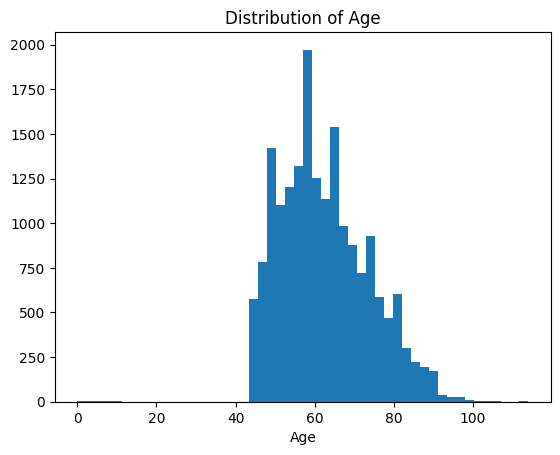

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=50)
plt.xlabel('Age')
plt.ylabel('')
plt.title('Distribution of Age')

In [ ]:
Q1 = np.quantile(data['Age'], 0.25)
Q3 = np.quantile(data['Age'], 0.75)
IQR = Q3 - Q1
k = 1.5 #Mucho mejor usar 1.5 que 3 en este caso. Mejor estimación
xL = Q1 - k * IQR
xU = Q3 + k * IQR
print(f"Bandas: [{xL},{xU}]")
for i in data['Age']:
    if i < xL  or i > xU:
        print(f" El dato[{i}] es un outlier")
        data = data.drop(data[data['Age'] == i].index) #Eliminamos los outlayers para no afectar a nuestro rango

Bandas: [30.0,94.0]
 El dato[98] es un outlier
 El dato[98] es un outlier
 El dato[100] es un outlier
 El dato[114] es un outlier
 El dato[98] es un outlier
 El dato[97] es un outlier
 El dato[96] es un outlier
 El dato[98] es un outlier
 El dato[100] es un outlier
 El dato[95] es un outlier
 El dato[2] es un outlier
 El dato[96] es un outlier
 El dato[100] es un outlier
 El dato[13] es un outlier
 El dato[112] es un outlier
 El dato[104] es un outlier
 El dato[104] es un outlier
 El dato[3] es un outlier
 El dato[8] es un outlier
 El dato[96] es un outlier
 El dato[11] es un outlier
 El dato[113] es un outlier
 El dato[111] es un outlier
 El dato[105] es un outlier
 El dato[102] es un outlier
 El dato[95] es un outlier
 El dato[1] es un outlier
 El dato[8] es un outlier
 El dato[95] es un outlier
 El dato[112] es un outlier
 El dato[96] es un outlier
 El dato[95] es un outlier
 El dato[96] es un outlier
 El dato[104] es un outlier
 El dato[98] es un outlier
 El dato[97] es un outlier


Text(0.5, 1.0, 'Distribution of Age')

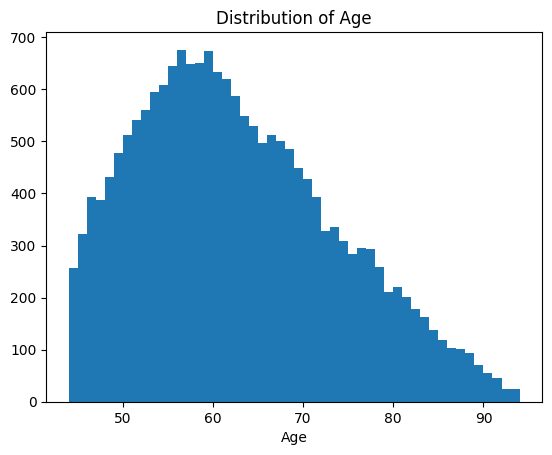

In [ ]:
plt.hist(data['Age'], bins=50)
plt.xlabel('Age')
plt.ylabel('')
plt.title('Distribution of Age')

In [ ]:
bins = [40, 61, 81, 100] #número de veces que vamos a partir los datos
labels = ['40-60', '61-80', '81+'] #nuestros rangos

data['AgeCategory'] = pd.cut(data['Age'], bins=bins, labels=labels, include_lowest=True) #con cut podemos segmentar datos en rangos de bins

print(data[['Age', 'AgeCategory']])

             Age AgeCategory
CustomerKey                 
11000         58       40-60
11001         59       40-60
11002         59       40-60
11003         56       40-60
11004         56       40-60
...          ...         ...
29479         66       61-80
29480         64       61-80
29481         64       61-80
29482         65       61-80
29483         65       61-80

[18409 rows x 2 columns]
